In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
plt.rcParams['figure.figsize'] = (20,10)


## Preprocessing

In [2]:
raw_data = pd.read_csv("./orgs/MSK_train.csv", sep=';')
print(raw_data.shape)
raw_data.head()

(15586222, 43)


,0_ID,1_TIME,BID_P_1,BID_V_1,BID_P_2,BID_V_2,BID_P_3,BID_V_3,BID_P_4,BID_V_4,...,ASK_V_6,ASK_P_7,ASK_V_7,ASK_P_8,ASK_V_8,ASK_P_9,ASK_V_9,ASK_P_10,ASK_V_10,Y
0,TEA,1970.01.01 01:11:29.966690,2418,7,2417,3,2416,3,2415,3,...,1.0,2431.0,2.0,2436.0,1.0,2437.0,1.0,2438.0,1.0,0.419566
1,TEA,1970.01.01 01:11:32.444868,2418,7,2417,3,2416,3,2415,4,...,1.0,2431.0,2.0,2436.0,1.0,2437.0,1.0,2438.0,1.0,0.420918
2,TEA,1970.01.01 01:11:33.886045,2420,1,2418,7,2417,3,2416,3,...,1.0,2431.0,2.0,2436.0,1.0,2437.0,1.0,2438.0,1.0,0.420918
3,TEA,1970.01.01 01:11:36.895255,2420,1,2418,7,2417,4,2416,3,...,1.0,2431.0,2.0,2436.0,1.0,2437.0,1.0,2438.0,1.0,0.413503
4,COFFEE,1970.01.01 01:21:29.006102,128694,53,128693,150,128692,107,128691,123,...,88.0,128701.0,172.0,128702.0,192.0,128703.0,155.0,128704.0,213.0,NaN


In [3]:
raw_data.columns = ['ID', 'TS',
                   'BID0', 'VBID0', 'BID1', 'VBID1', 'BID2', 'VBID2', 'BID3', 'VBID3', 'BID4', 'VBID4', 
                   'BID5', 'VBID5', 'BID6', 'VBID6', 'BID7', 'VBID7', 'BID8', 'VBID8', 'BID9', 'VBID9',
                   'ASK0', 'VASK0', 'ASK1', 'VASK1', 'ASK2', 'VASK2', 'ASK3', 'VASK3', 'ASK4', 'VASK4',
                   'ASK5', 'VASK5', 'ASK6', 'VASK6', 'ASK7', 'VASK7', 'ASK8', 'VASK8', 'ASK9', 'VASK9', 
                   'Y']

In [39]:
data_len_for_train = int(15e5)
df = raw_data.loc[raw_data.ID=='TEA'].reset_index().drop('index', axis=1)[:data_len_for_train]

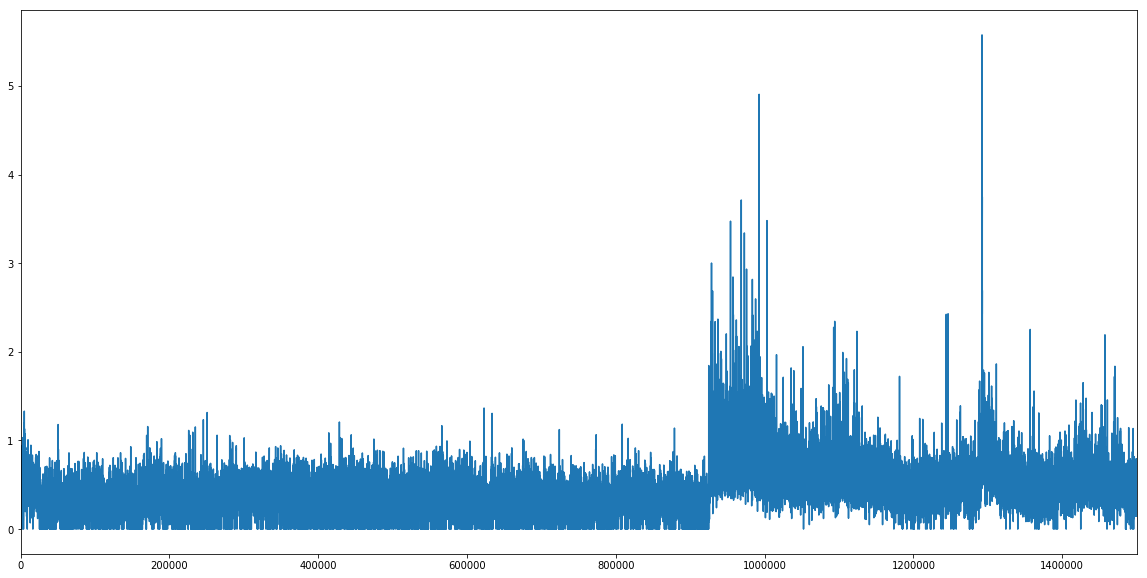

In [19]:
df.Y.plot()

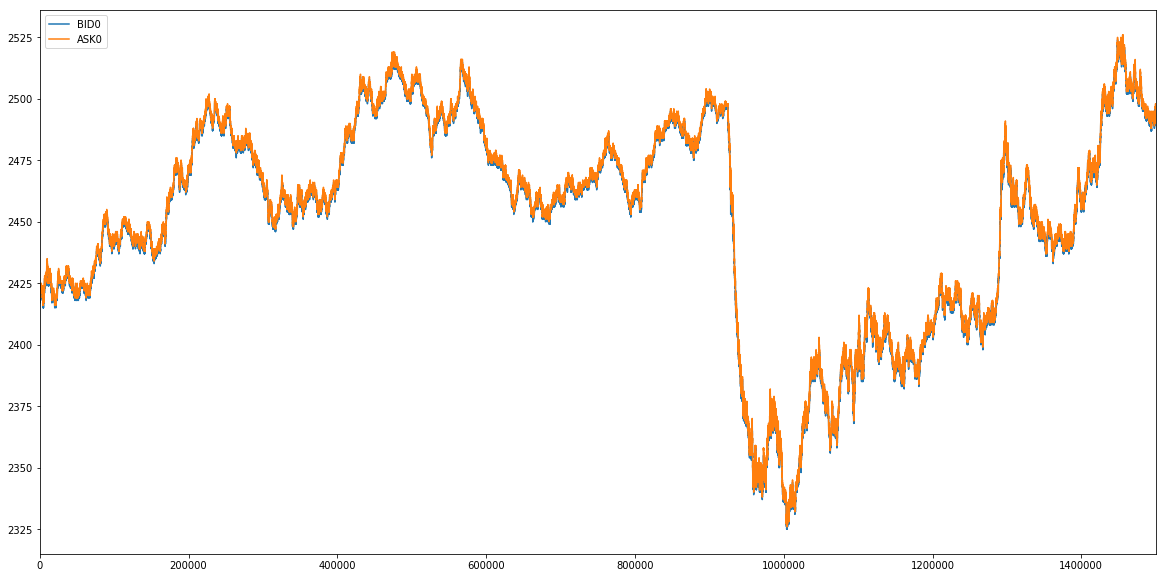

In [20]:
df[['BID0','ASK0']].plot()

In [34]:
#(raw_data.Y>3).sum()

944

In [35]:
# Установим границу на Y (max value) == 3 
#df.loc[df.Y>3, 'Y'] = 3

In [60]:
X = pd.DataFrame()

for i in range(3):
    X[f'x{i}_1'] = df[f'BID{i}']
    X[f'x{i}_2'] = df[f'BID{i}']*df[f'VBID{i}']
    X[f'x{i}_3'] = df[f'ASK{i}']
    X[f'x{i}_4'] = df[f'ASK{i}']*df[f'VASK{i}']
    X[f'x{i}_5'] = df[f'BID{i}']-df[f'ASK{i}']
    
X = X.values

In [51]:
Y = df.Y.values

In [62]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [79]:
train_size = int(0.7*X.shape[0])
X_train, X_test, y_train, y_test = X[:train_size], X[train_size:], Y[:train_size], Y[train_size:]

In [80]:
# fit model no training data
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [81]:
# make predictions for test data
y_pred = model.predict(X_test)

In [82]:
from sklearn.metrics import mean_squared_error
def rmse(ytrue, ypred):
    return np.sqrt(mean_squared_error(ytrue, ypred))

In [87]:
score_test = rmse(y_test, y_pred)
    
print(10/score_test)

40.8711609328
